# Prediction of soil nutrients task
# Verma Ayush 211IT079

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Importing libaries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsRegressor
import pickle

# Importing dataset

In [3]:
df = pd.read_csv('/content/soil_nutrients.csv')

In [4]:
df.dropna(inplace=True)

In [5]:
df

,Soil Type,pH Level,Organic Matter (%),CEC (meq/100g),Texture,Temperature (°C),Precipitation (mm),Land Use/Land Cover,Nitrogen (ppm),Phosphorus (ppm),Potassium (ppm)
0,Clay,6.5,2.3,20,Clayey,25,100,Agricultural,25,10,30.0
1,Loam,6.8,3.5,15,Loamy,22,120,Forest,20,8,35.0
2,Sandy,5.8,1.0,5,Sandy,30,80,Grassland,15,6,20.0
3,Clay,7.2,4.0,25,Clayey,20,90,Agricultural,30,12,40.0
4,Sandy,6.0,2.5,10,Sandy,28,85,Grassland,18,7,25.0
...,...,...,...,...,...,...,...,...,...,...,...
395,Clay,6.6,2.9,21,Clayey,22,99,Agricultural,20,11,31.0
396,Loam,7.1,3.4,23,Loamy,25,106,Forest,27,13,35.0
397,Sandy,6.5,1.7,8,Sandy,27,77,Grassland,13,5,19.0
398,Clay,6.8,3.2,24,Clayey,24,101,Agricultural,21,9,32.0


#Exploratory data Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 399 entries, 0 to 399
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Soil Type            399 non-null    object 
 1   pH Level             399 non-null    float64
 2   Organic Matter (%)   399 non-null    float64
 3   CEC (meq/100g)       399 non-null    int64  
 4   Texture              399 non-null    object 
 5   Temperature (°C)     399 non-null    int64  
 6   Precipitation (mm)   399 non-null    int64  
 7   Land Use/Land Cover  399 non-null    object 
 8   Nitrogen (ppm)       399 non-null    int64  
 9   Phosphorus (ppm)     399 non-null    int64  
 10  Potassium (ppm)      399 non-null    float64
dtypes: float64(3), int64(5), object(3)
memory usage: 37.4+ KB


In [7]:
print(df.describe(include='all'))

       Soil Type    pH Level  Organic Matter (%)  CEC (meq/100g) Texture  \
count        399  399.000000          399.000000      399.000000     399   
unique         3         NaN                 NaN             NaN       3   
top         Clay         NaN                 NaN             NaN  Clayey   
freq         136         NaN                 NaN             NaN     136   
mean         NaN    6.729323            2.571429       15.674185     NaN   
std          NaN    0.266312            0.834396        6.543946     NaN   
min          NaN    5.800000            1.000000        5.000000     NaN   
25%          NaN    6.500000            1.800000        9.000000     NaN   
50%          NaN    6.700000            2.700000       16.000000     NaN   
75%          NaN    6.900000            3.300000       21.000000     NaN   
max          NaN    7.400000            4.000000       29.000000     NaN   

        Temperature (°C)  Precipitation (mm) Land Use/Land Cover  \
count         399.0

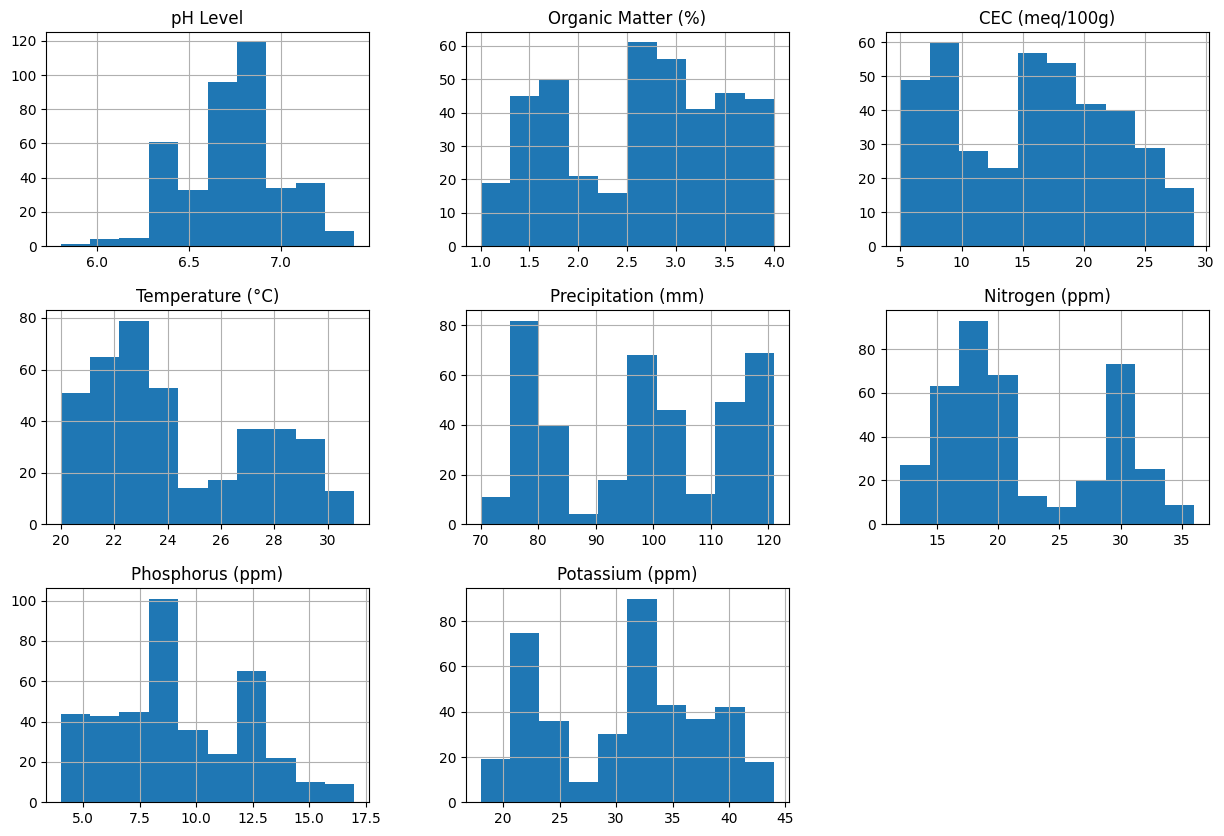

In [8]:
df.hist(bins=10, figsize=(15, 10))
plt.show()

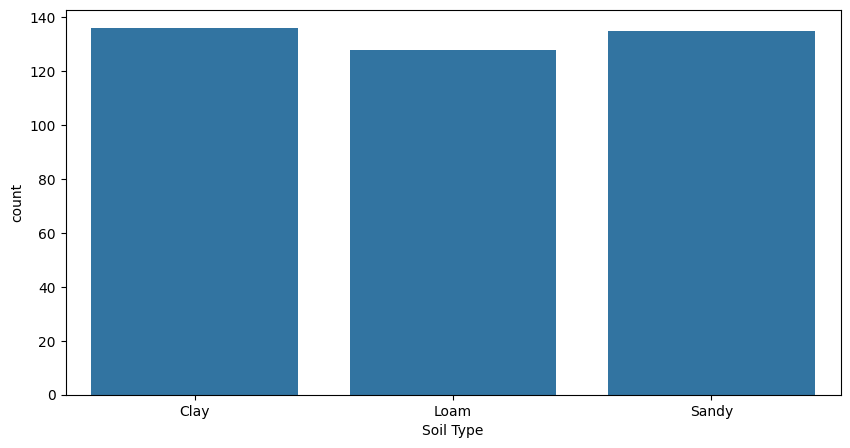

In [9]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Soil Type', data=df)
plt.show()

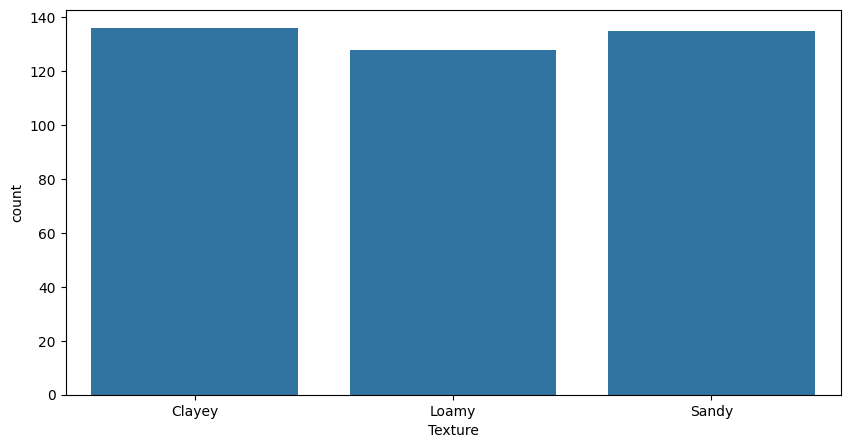

In [10]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Texture', data=df)
plt.show()

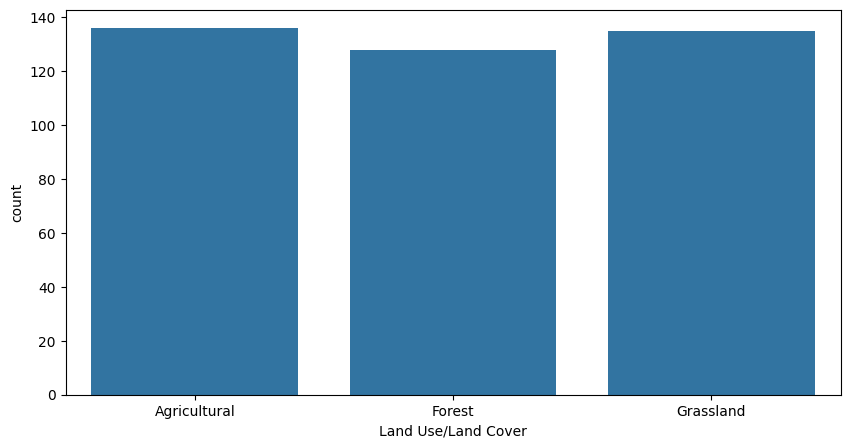

In [11]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Land Use/Land Cover', data=df)
plt.show()

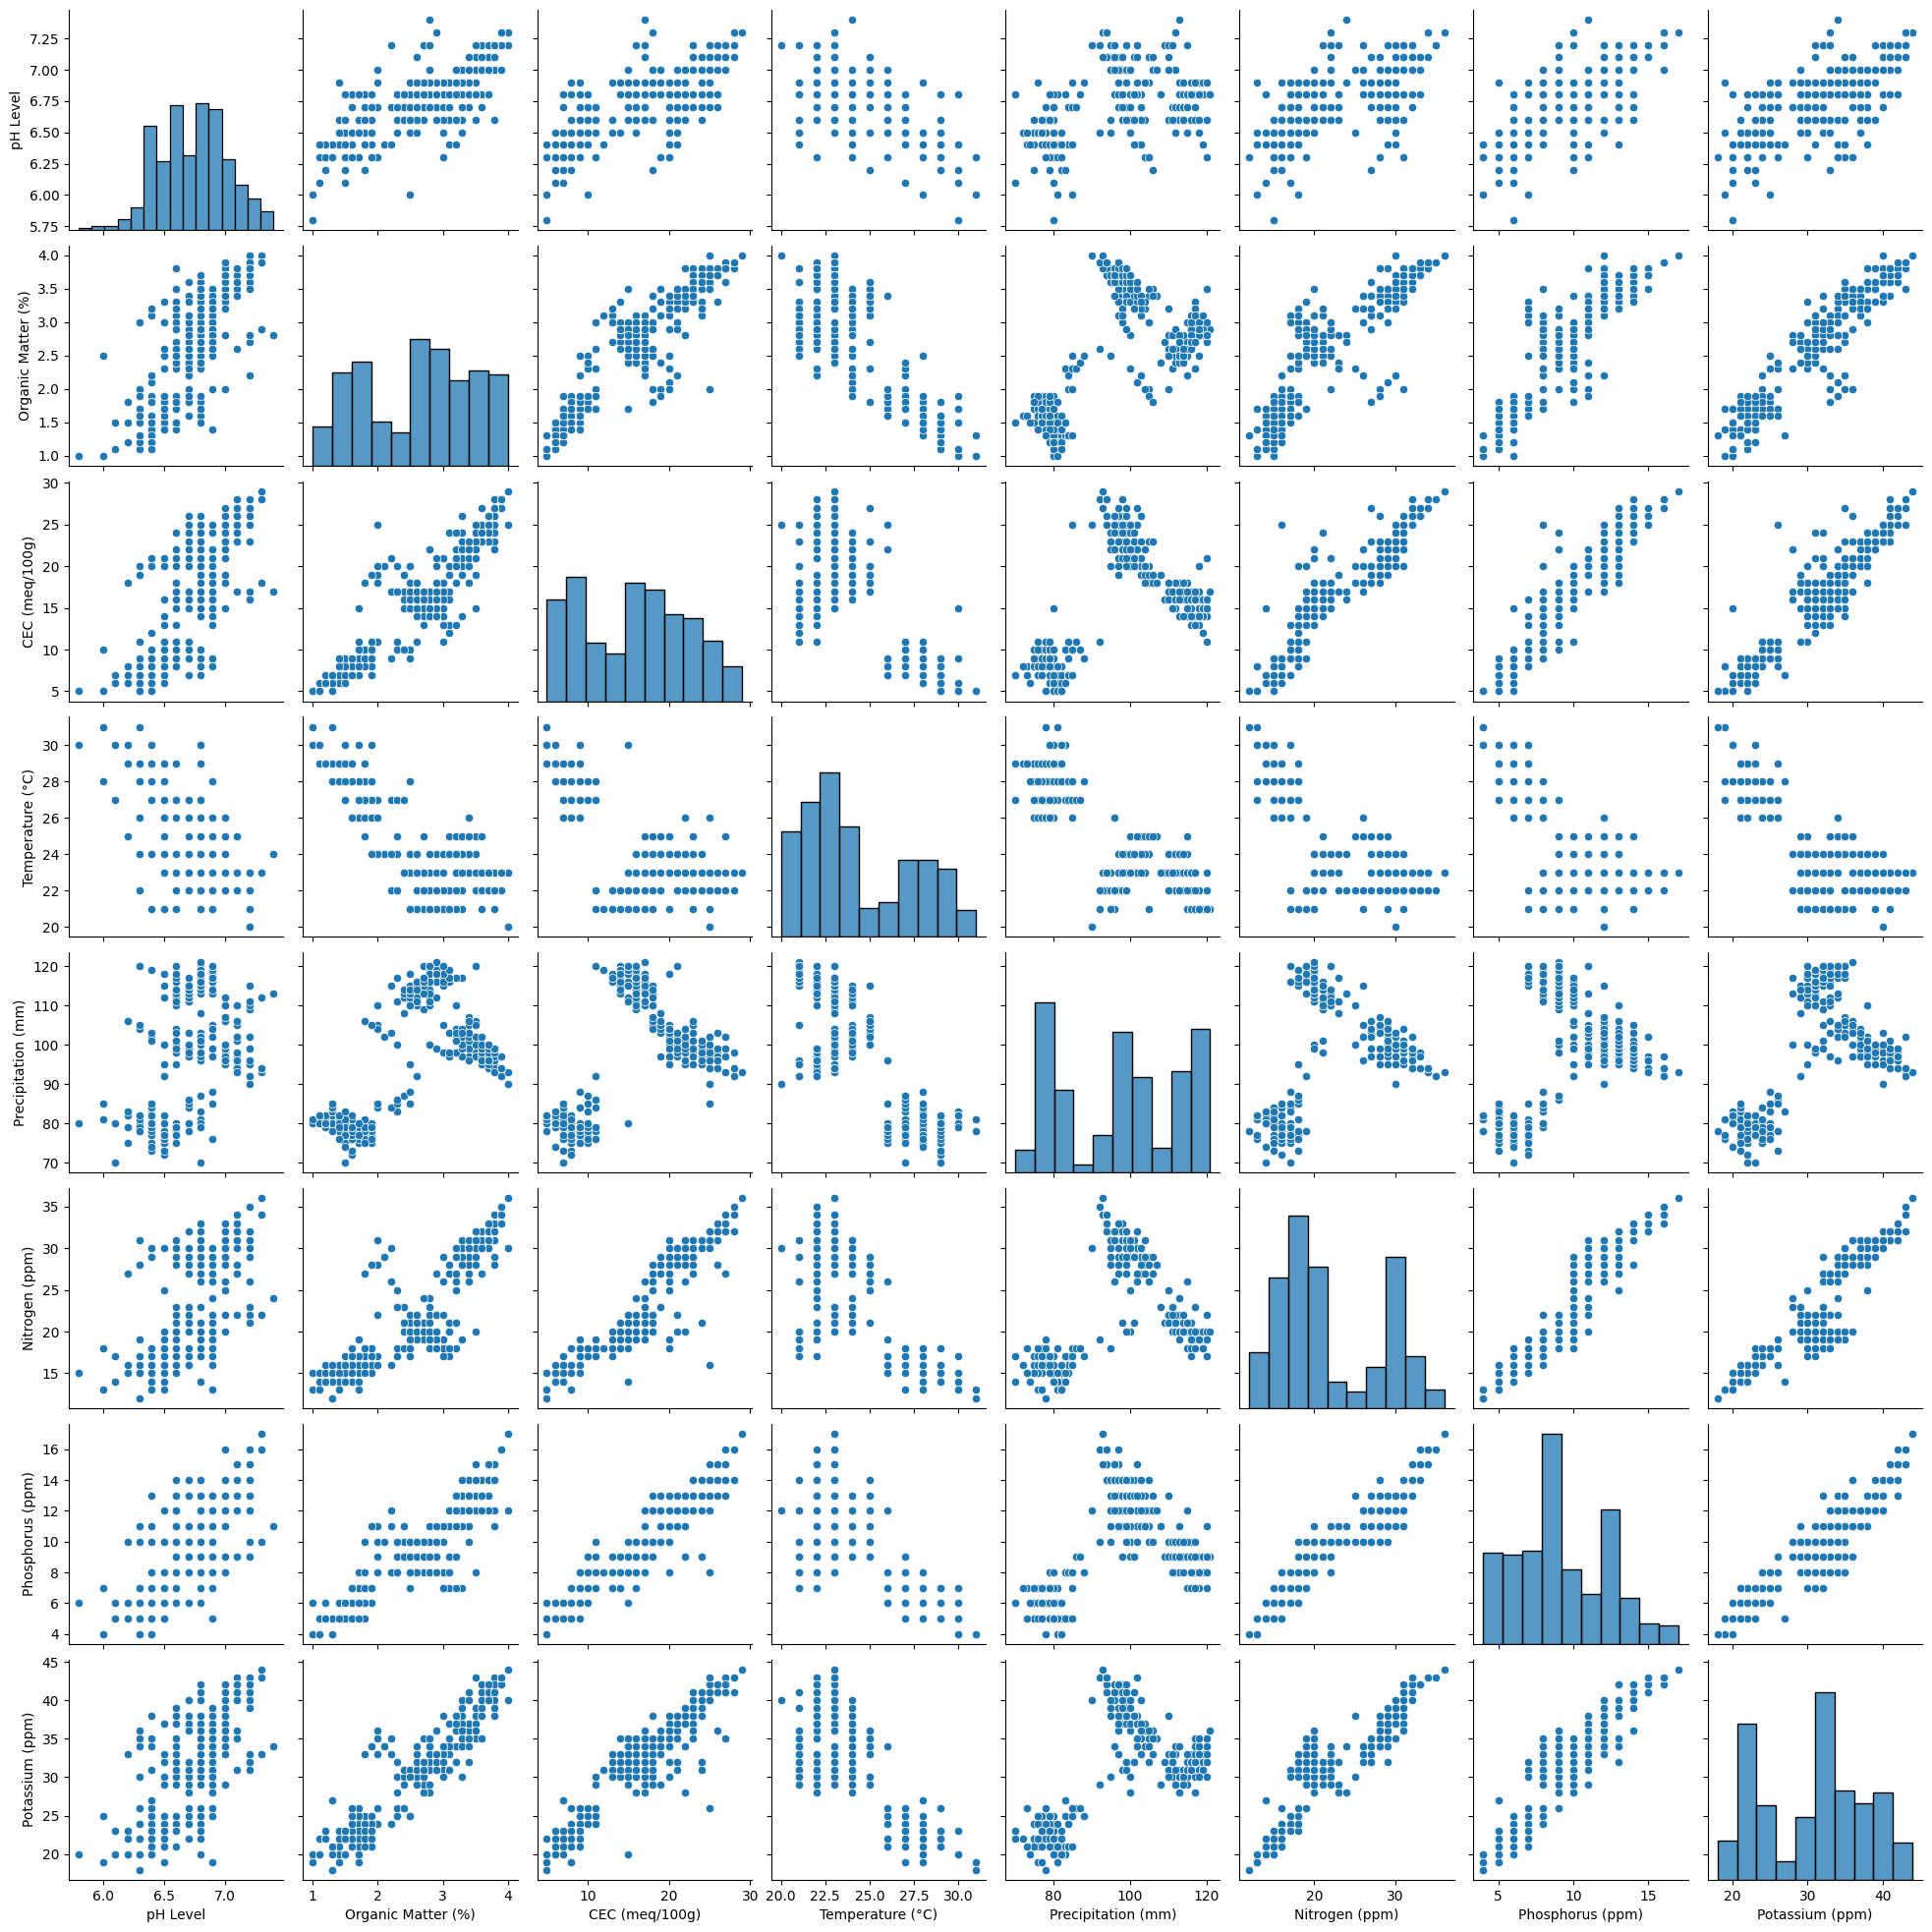

In [ ]:
sns.pairplot(df)
plt.show()

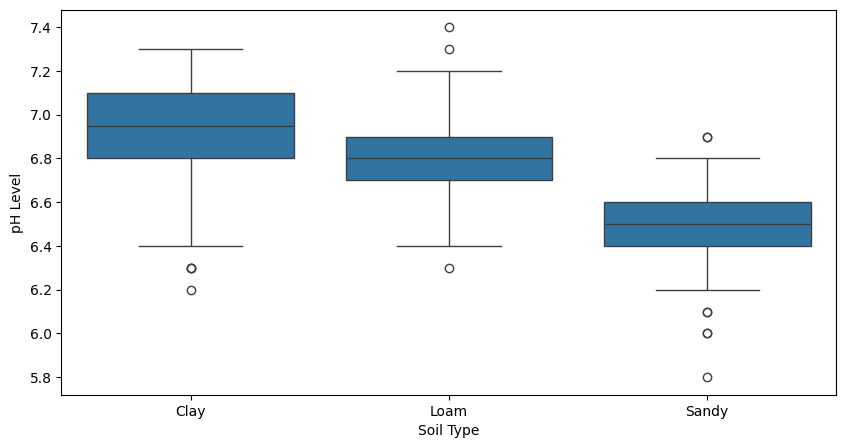

In [12]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Soil Type', y='pH Level', data=df)
plt.show()

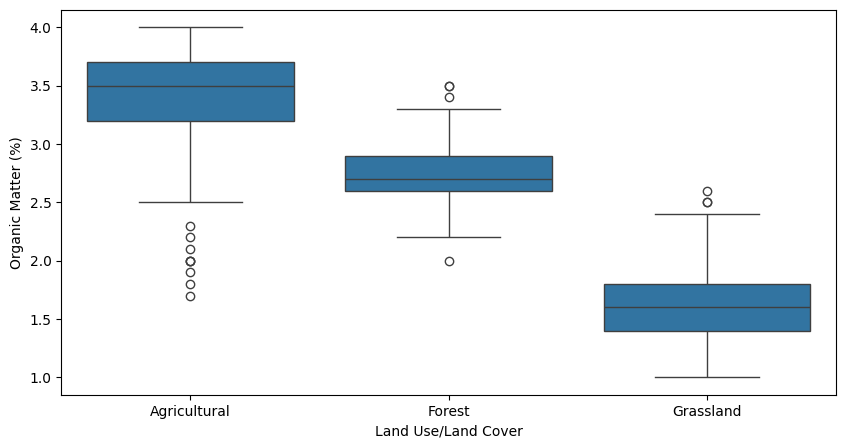

In [13]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Land Use/Land Cover', y='Organic Matter (%)', data=df)
plt.show()

# Non numeric  to categorial values

In [14]:
label_encoder = LabelEncoder()
df['Soil Type'] = label_encoder.fit_transform(df['Soil Type'])
df['Texture'] = label_encoder.fit_transform(df['Texture'])
df['Land Use/Land Cover'] = label_encoder.fit_transform(df['Land Use/Land Cover'])

#Correlation Matrix

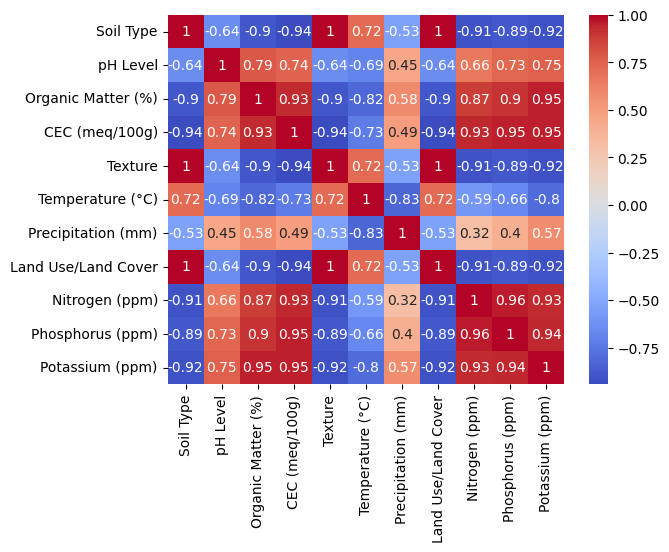

In [15]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

#Spliting labels and non labels X ,y

In [16]:
X = df.drop(columns=['Nitrogen (ppm)', 'Phosphorus (ppm)', 'Potassium (ppm)'])
y = df[['Nitrogen (ppm)', 'Phosphorus (ppm)', 'Potassium (ppm)']]

In [17]:
y

,Nitrogen (ppm),Phosphorus (ppm),Potassium (ppm)
0,25,10,30.0
1,20,8,35.0
2,15,6,20.0
3,30,12,40.0
4,18,7,25.0
...,...,...,...
395,20,11,31.0
396,27,13,35.0
397,13,5,19.0
398,21,9,32.0


#Train test split

In [18]:
# X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
X_train.shape

(319, 8)

In [20]:
y_test

,Nitrogen (ppm),Phosphorus (ppm),Potassium (ppm)
198,30,12,37.0
349,31,13,40.0
33,16,5,23.0
208,21,10,31.0
93,20,8,30.0
...,...,...,...
249,31,13,38.0
225,31,13,38.0
368,16,6,23.0
175,32,13,40.0


# Train,testing dataset wrt ML models
# Decision Tree, Knearestneighbour,Neural Networks,Random Forests,Xg boost

1)Decision Tree

R^2 Score of Decision Tree: 0.8562129836491774
Mean Squared Error of Decision Tree: 4.357291666666666


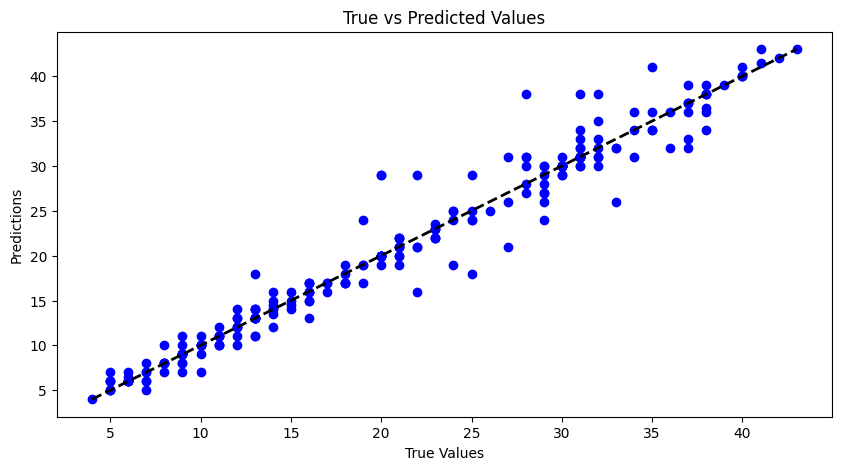

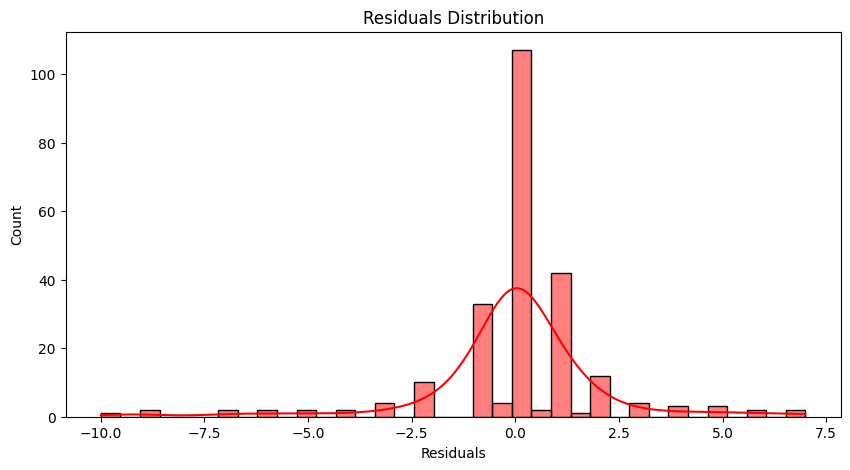

In [21]:
dt = DecisionTreeRegressor(random_state=0)

# Train the model on the training data
dt.fit(X_train, y_train)

# Evaluate the model on the testing data
dt_score = dt.score(X_test, y_test)
y_predict = dt.predict(X_test)
y_true = y_test

print('R^2 Score of Decision Tree:', dt_score)
mse = mean_squared_error(y_true, y_predict)
print('Mean Squared Error of Decision Tree:', mse)

# Visualizing the true vs predicted values
plt.figure(figsize=(10, 5))
plt.scatter(y_true, y_predict, color='blue')
plt.plot([y_true.min().min(), y_true.max().max()], [y_true.min().min(), y_true.max().max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.show()

# Convert y_true and y_predict to numpy arrays if they are not already
y_true = np.array(y_true)
y_predict = np.array(y_predict)

# Plotting residuals
residuals = y_true - y_predict
plt.figure(figsize=(10, 5))
sns.histplot(residuals.flatten(), kde=True, color='red')
plt.xlabel('Residuals')
plt.title('Residuals Distribution')
plt.show()

2)MLP regressor Neural networks

R^2 Score of MLP: 0.9140124625986236
Mean Squared Error of MLP: 2.412878740316932


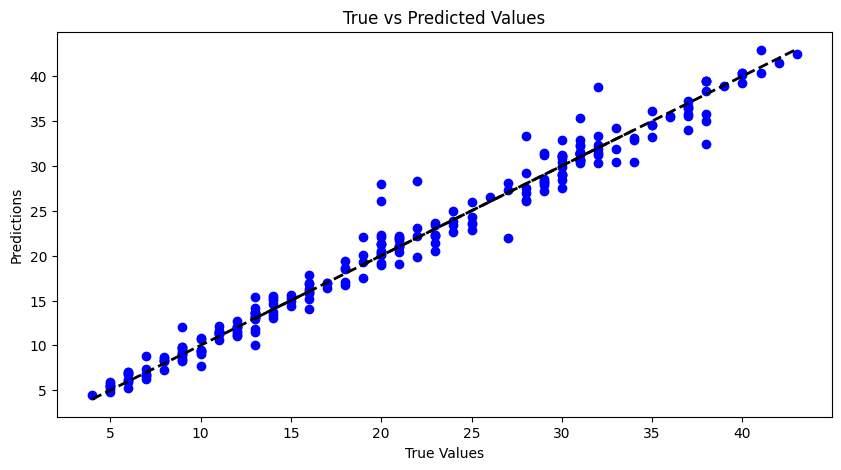

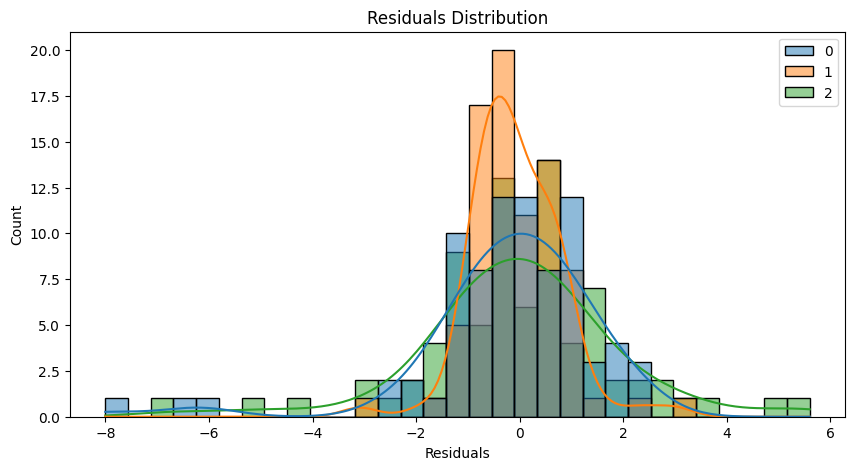

In [22]:
# Assuming X_train, X_test, y_train, y_test are already defined as in your provided code.

# Initialize the MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=0)

# Train the model on the training df
mlp.fit(X_train, y_train)

# Evaluate the model on the testing df
mlp_score = mlp.score(X_test, y_test)
y_predict = mlp.predict(X_test)
y_true = y_test

print('R^2 Score of MLP: ' + str(mlp_score))
mse = mean_squared_error(y_true, y_predict)
print('Mean Squared Error of MLP: ' + str(mse))

# Visualizing the true vs predicted values
plt.figure(figsize=(10, 5))
plt.scatter(y_true, y_predict, color='blue')
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.show()

# Convert y_true and y_predict to numpy arrays if they are not already
y_true = np.array(y_true)
y_predict = np.array(y_predict)

# Plotting residuals
residuals = y_true - y_predict
plt.figure(figsize=(10, 5))
sns.histplot(residuals, kde=True, color='red')
plt.xlabel('Residuals')
plt.title('Residuals Distribution')
plt.show()

3)Random Forest

R^2 Score of Random Forest: 0.9387521693505788
Mean Squared Error of Random Forest: 1.701189363280528


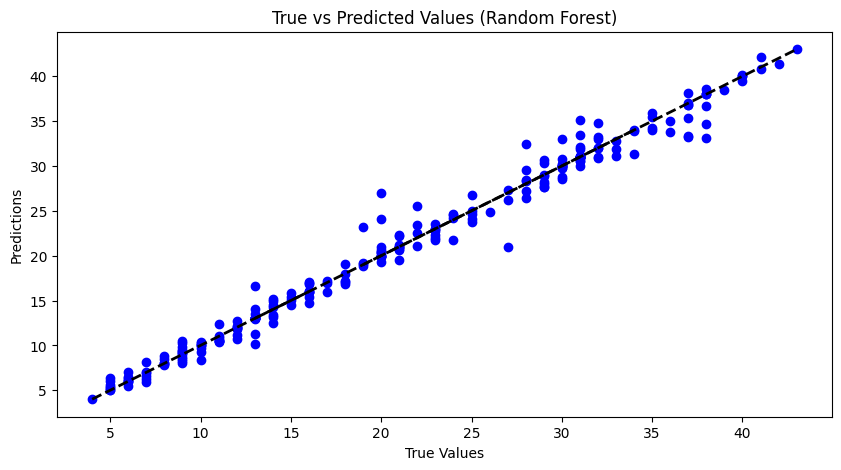

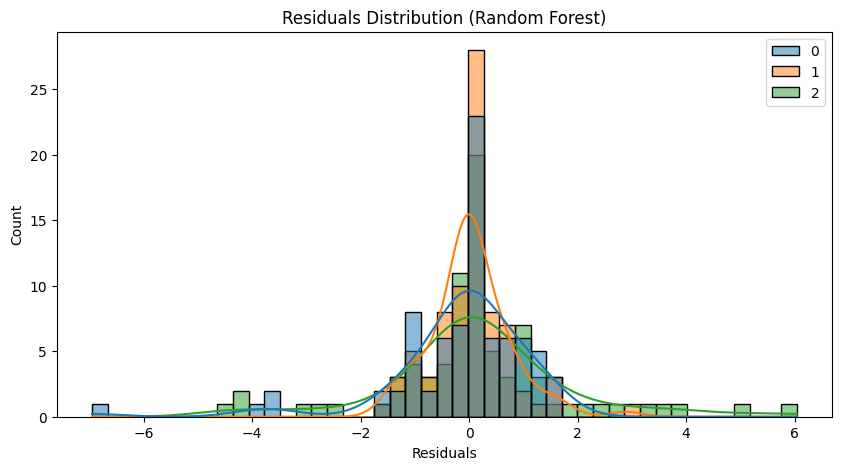

In [23]:
# Assuming X_train, X_test, y_train, y_test are already defined as in your provided code.

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(random_state=0)

# Train the model on the training df
rf.fit(X_train, y_train)

# Evaluate the model on the testing df
rf_score = rf.score(X_test, y_test)
y_predict = rf.predict(X_test)
y_true = y_test

print('R^2 Score of Random Forest: ' + str(rf_score))
mse = mean_squared_error(y_true, y_predict)
print('Mean Squared Error of Random Forest: ' + str(mse))

# Visualizing the true vs predicted values
plt.figure(figsize=(10, 5))
plt.scatter(y_true, y_predict, color='blue')
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values (Random Forest)')
plt.show()

# Convert y_true and y_predict to numpy arrays if they are not already
y_true = np.array(y_true)
y_predict = np.array(y_predict)

# Plotting residuals
residuals = y_true - y_predict
plt.figure(figsize=(10, 5))
sns.histplot(residuals, kde=True, color='red')
plt.xlabel('Residuals')
plt.title('Residuals Distribution (Random Forest)')
plt.show()


4)Xg boost

R^2 Score of XGBoost: 0.9280928272585242
Mean Squared Error of XGBoost: 2.032648859604579


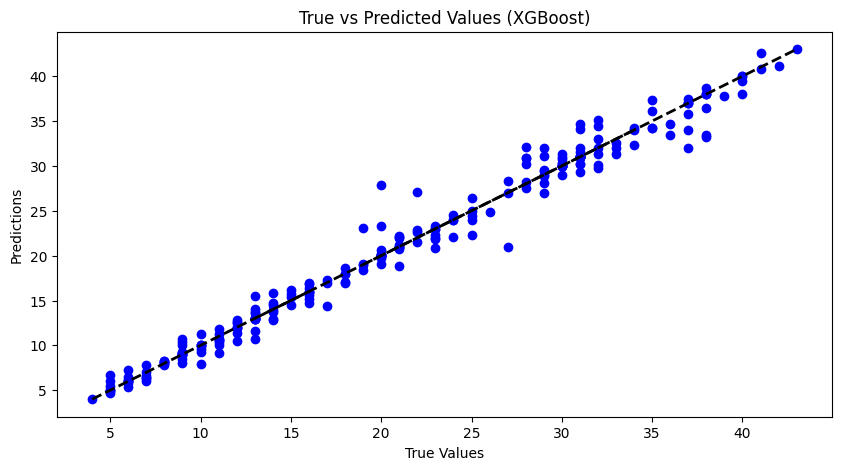

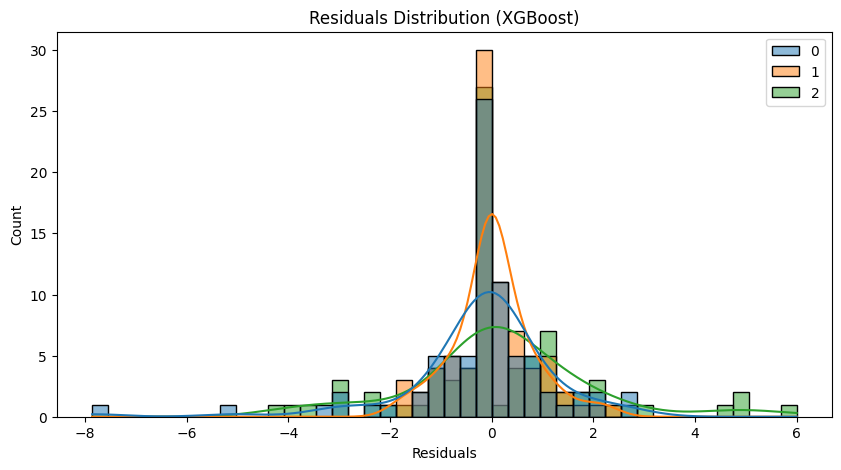

In [24]:
# Assuming X_train, X_test, y_train, y_test are already defined as in your provided code.

# Initialize the XGBoost Regressor
xg = xgb.XGBRegressor(objective='reg:squarederror', random_state=0)

# Train the model on the training df
xg.fit(X_train, y_train)

# Evaluate the model on the testing df
xgb_score = xg.score(X_test, y_test)
y_predict = xg.predict(X_test)
y_true = y_test

print('R^2 Score of XGBoost: ' + str(xgb_score))
mse = mean_squared_error(y_true, y_predict)
print('Mean Squared Error of XGBoost: ' + str(mse))

# Visualizing the true vs predicted values
plt.figure(figsize=(10, 5))
plt.scatter(y_true, y_predict, color='blue')
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values (XGBoost)')
plt.show()

# Convert y_true and y_predict to numpy arrays if they are not already
y_true = np.array(y_true)
y_predict = np.array(y_predict)

# Plotting residuals
residuals = y_true - y_predict
plt.figure(figsize=(10, 5))
sns.histplot(residuals, kde=True, color='red')
plt.xlabel('Residuals')
plt.title('Residuals Distribution (XGBoost)')
plt.show()

5)KNN

R^2 Score of KNN: 0.90467608586731
Mean Squared Error of KNN: 2.6318333333333346


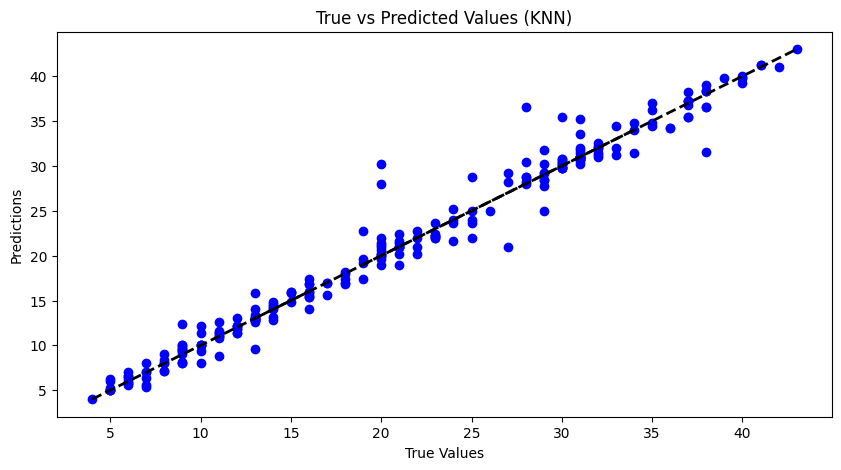

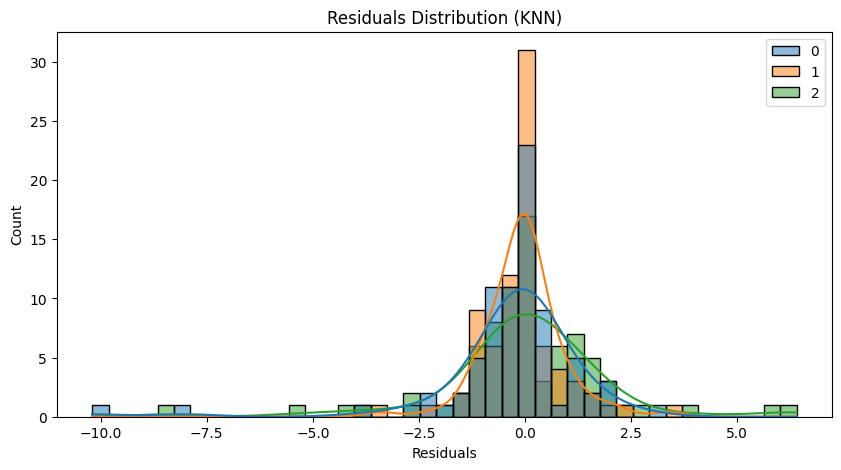

In [25]:
# Initialize the KNeighbors Regressor
knn = KNeighborsRegressor(n_neighbors=5)

# Train the model on the training data
knn.fit(X_train, y_train)

# Evaluate the model on the testing data
knn_score = knn.score(X_test, y_test)
y_predict = knn.predict(X_test)
y_true = y_test

print('R^2 Score of KNN: ' + str(knn_score))
mse = mean_squared_error(y_true, y_predict)
print('Mean Squared Error of KNN: ' + str(mse))

# Visualizing the true vs predicted values
plt.figure(figsize=(10, 5))
plt.scatter(y_true, y_predict, color='blue')
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values (KNN)')
plt.show()

# Convert y_true and y_predict to numpy arrays if they are not already
y_true = np.array(y_true)
y_predict = np.array(y_predict)

# Plotting residuals
residuals = y_true - y_predict
plt.figure(figsize=(10, 5))
sns.histplot(residuals, kde=True, color='red')
plt.xlabel('Residuals')
plt.title('Residuals Distribution (KNN)')
plt.show()

# Generating Trained Models for prediction of soil nutrients quantity

In [26]:
with open('dt_model.pkl', 'wb') as f:
    pickle.dump(dt, f)

In [27]:
with open('mlp_model.pkl', 'wb') as f:
    pickle.dump(mlp, f)

In [28]:
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf, f)

In [29]:
with open('xg_model.pkl', 'wb') as f:
    pickle.dump(xg, f)

In [30]:
with open('knn_model.pkl', 'wb') as f:
    pickle.dump(knn, f)

#Opening Models for testing soil nutrients quantity

In [31]:
with open('dt_model.pkl', 'rb') as f:
    dt_model = pickle.load(f)

In [32]:
with open('mlp_model.pkl', 'rb') as f:
    mlp_model = pickle.load(f)

In [33]:
with open('rf_model.pkl', 'rb') as f:
    rf_model = pickle.load(f)

In [34]:
with open('xg_model.pkl', 'rb') as f:
    xg_model = pickle.load(f)

In [35]:
with open('knn_model.pkl', 'rb') as f:
    knn_model = pickle.load(f)

#Input for testing

In [36]:
sample_input = ['Loam', 6.8, 2.8, 15, 'Loamy', 21, 118, 'Forest']
# Convert categorical values to numerical values
if sample_input[0] == 'Clay':
  sample_input[0] = 0
elif sample_input[0] == 'Loam':
  sample_input[0] = 1
else:
  sample_input[0] = 2

if sample_input[4] == 'Clayey':
  sample_input[4] = 0
elif sample_input[4] == 'Loamy':
  sample_input[4] = 1
else:
  sample_input[4] = 2

if sample_input[7] == 'Agricultural':
  sample_input[7] = 0
elif sample_input[7] == 'Forest':
  sample_input[7] = 1
else:
  sample_input[7] = 2
# Convert the sample input to a numpy array
sample_input = np.array(sample_input)
# Reshape the sample input to match the model's expectations
sample_input = sample_input.reshape(1, -1)

#Evaluation of input WRT 5 models

In [37]:
dt_prediction = dt_model.predict(sample_input)

In [38]:
mlp_prediction = mlp_model.predict(sample_input)

In [39]:
rf_prediction = rf_model.predict(sample_input)

In [40]:
xg_prediction = xg_model.predict(sample_input)

In [41]:
knn_prediction = knn_model.predict(sample_input)

#Results:

In [42]:
print("Decision Tree Prediction:")
print("Nitrogen (ppm):",dt_prediction[0][0])
print("Phosphorus (ppm):",dt_prediction[0][1])
print("Potassium (ppm):",dt_prediction[0][2])

Decision Tree Prediction:
Nitrogen (ppm): 20.0
Phosphorus (ppm): 9.0
Potassium (ppm): 33.0


In [43]:
print("MLP prediction:")
print("Nitrogen (ppm):",mlp_prediction[0][0])
print("Phosphorus (ppm):",mlp_prediction[0][1])
print("Potassium (ppm):",mlp_prediction[0][2])

MLP prediction:
Nitrogen (ppm): 19.13978149709769
Phosphorus (ppm): 8.540195548328814
Potassium (ppm): 32.32692915438475


In [44]:
print("Random Forest Prediction:")
print("Nitrogen (ppm):",rf_prediction[0][0])
print("Phosphorus (ppm):",rf_prediction[0][1])
print("Potassium (ppm):",rf_prediction[0][2])

Random Forest Prediction:
Nitrogen (ppm): 19.320666666666668
Phosphorus (ppm): 8.46411111111111
Potassium (ppm): 33.172222222222224


In [45]:
print("XGBoost Prediction:")
print("Nitrogen (ppm):",xg_prediction[0][0])
print("Phosphorus (ppm):",xg_prediction[0][1])
print("Potassium (ppm):",xg_prediction[0][2])

XGBoost Prediction:
Nitrogen (ppm): 19.766815
Phosphorus (ppm): 8.9415455
Potassium (ppm): 34.46381


In [46]:
print("KNN prediction:")
print("Nitrogen (ppm):",knn_prediction[0][0])
print("Phosphorus (ppm):",knn_prediction[0][1])
print("Potassium (ppm):",knn_prediction[0][2])

KNN prediction:
Nitrogen (ppm): 19.0
Phosphorus (ppm): 8.2
Potassium (ppm): 32.6
